Saving SP500_datos1y.xlsx to SP500_datos1y.xlsx


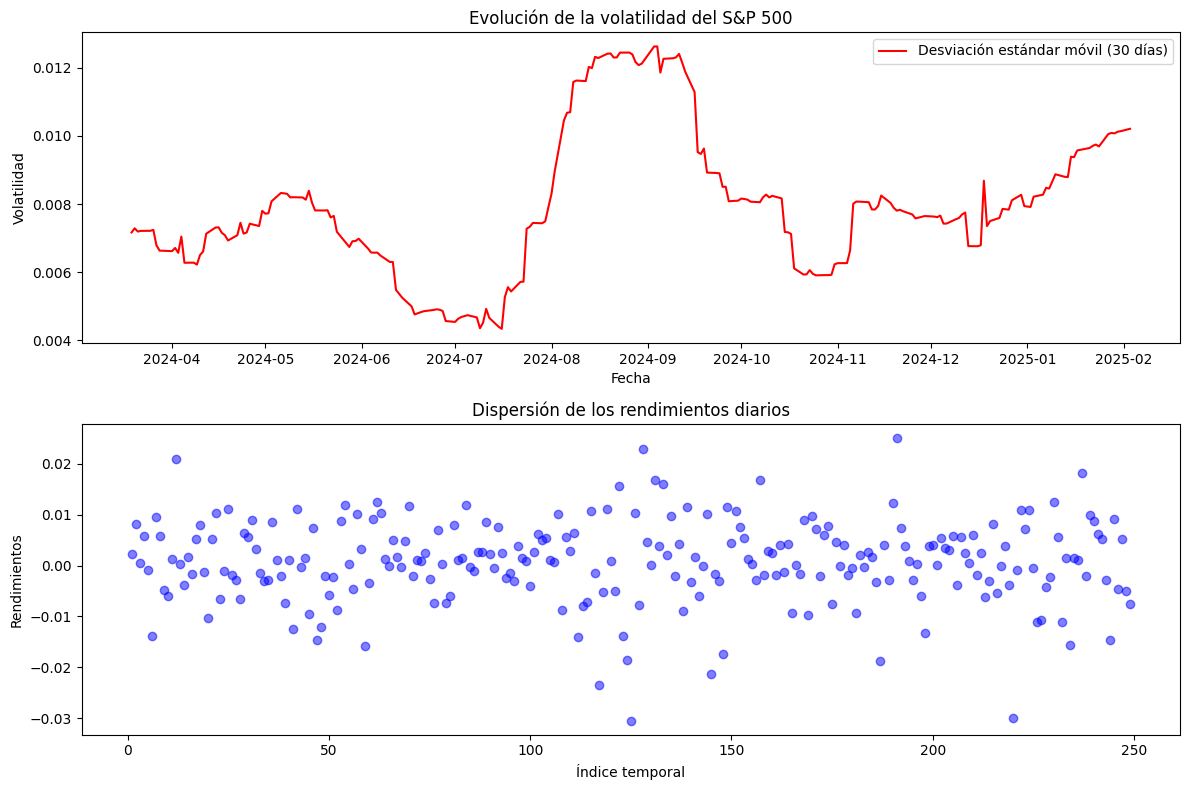


游릭 Resultado: Se observa homocedasticidad (la volatilidad es m치s o menos constante).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar archivo desde Google Drive o subir manualmente en Colab
from google.colab import files
uploaded = files.upload()

# Cargar el archivo Excel
file_name = list(uploaded.keys())[0]
xls = pd.ExcelFile(file_name)

# Leer la hoja con los datos
df = xls.parse('s&p500')

# Convertir la columna de fecha al formato correcto
df['Date'] = pd.to_datetime(df['Date'])

# Calcular los rendimientos logar칤tmicos
df['Returns'] = np.log(df['Close'] / df['Close'].shift(1))
df = df.dropna()  # Eliminar valores NaN

# Calcular la desviaci칩n est치ndar m칩vil (rolling volatility)
window = 30  # Ventana de 30 d칤as
df['Rolling_Std'] = df['Returns'].rolling(window=window).std()

# Crear gr치ficos
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Gr치fico de la volatilidad m칩vil
ax[0].plot(df['Date'], df['Rolling_Std'], color='red', label='Desviaci칩n est치ndar m칩vil (30 d칤as)')
ax[0].set_title("Evoluci칩n de la volatilidad del S&P 500")
ax[0].set_xlabel("Fecha")
ax[0].set_ylabel("Volatilidad")
ax[0].legend()

# Gr치fico de dispersi칩n de los rendimientos
ax[1].scatter(df.index, df['Returns'], alpha=0.5, color='blue')
ax[1].set_title("Dispersi칩n de los rendimientos diarios")
ax[1].set_xlabel("칈ndice temporal")
ax[1].set_ylabel("Rendimientos")

plt.tight_layout()
plt.show()

# Decisi칩n autom치tica sobre heterocedasticidad
volatility_variation = df['Rolling_Std'].std()
threshold = df['Rolling_Std'].mean() * 0.5  # Un criterio simple

if volatility_variation > threshold:
    print("\n游댮 Resultado: Se observa heterocedasticidad (la volatilidad var칤a significativamente en el tiempo).")
else:
    print("\n游릭 Resultado: Se observa homocedasticidad (la volatilidad es m치s o menos constante).")


In [ ]:
from statsmodels.stats.diagnostic import het_arch

# Aplicar el test ARCH a los rendimientos
arch_test = het_arch(df['Returns'])

# Resultados del test
arch_results = {
    "LM Statistic": arch_test[0],
    "p-value": arch_test[1]
}

# Interpretaci칩n
if arch_results["p-value"] < 0.05:
    conclusion = "游댮 Resultado: Se observa heterocedasticidad (p < 0.05)."
else:
    conclusion = "游릭 Resultado: No hay evidencia de heterocedasticidad (p >= 0.05)."

arch_results, conclusion


({'LM Statistic': 15.298521818635294, 'p-value': 0.12155138723750691},
 '游릭 Resultado: No hay evidencia de heterocedasticidad (p >= 0.05).')